In [15]:
import pandas as pd
import numpy as np


In [16]:
train_full = pd.read_csv('train_data_normalizedv4.csv')
test_full = pd.read_csv('test_normalized_v4.csv')

In [17]:
train_full.Accident.value_counts()

0.0    577713
1.0    247217
2.0      1872
3.0       444
Name: Accident, dtype: int64

In [44]:
577713/(577713+247217+1872+444)

0.6983569579061125

In [18]:
train_full.head()

,Unnamed: 0,aadt,access,curv_rad_binary,lanewid,med_type_binary,no_lanes,oneway,rodwycls,rururb,seg_lng,spd_limt,surf_cat,Accident
0,0,-0.481139,0,0,0.727296,0,0.727296,2,8,1,0.727296,0.727296,1,0.0
1,1,-0.535222,0,0,-0.041433,0,-0.041433,2,8,1,-0.041433,-0.041433,1,0.0
2,2,-0.506100,0,0,-0.810162,0,-0.810162,2,8,1,-0.810162,-0.810162,1,0.0
3,3,-0.348013,0,0,6.108399,0,6.108399,1,99,2,6.108399,6.108399,1,1.0
4,4,0.076327,2,0,-0.041433,1,-0.041433,2,1,2,-0.041433,-0.041433,1,0.0


In [19]:
train = train_full[['aadt', 'access', 'curv_rad_binary', 'lanewid',
       'med_type_binary', 'no_lanes', 'oneway', 'rodwycls', 'rururb',
       'seg_lng', 'spd_limt', 'surf_cat', 'Accident']]
test = test_full[['aadt', 'access', 'curv_rad_binary', 'lanewid',
       'med_type_binary', 'no_lanes', 'oneway', 'rodwycls', 'rururb',
       'seg_lng', 'spd_limt', 'surf_cat', 'Accident']]

In [38]:
train.shape

(827246, 13)

In [31]:
train_encoded = pd.get_dummies(train,
                     columns = ['access', 'curv_rad_binary', 'med_type_binary', 'oneway','rodwycls','rururb','surf_cat'], drop_first = True)
test_encoded = pd.get_dummies(test,
                     columns = ['access', 'curv_rad_binary', 'med_type_binary', 'oneway','rodwycls','rururb','surf_cat'], drop_first = True)

In [4]:
#test_encoded['rodwycls_2'] = 0

In [21]:
print(len(train_encoded.columns))
print(len(test_encoded.columns))

24
24


In [11]:
train_encoded.columns

Index(['aadt', 'lanewid', 'no_lanes', 'seg_lng', 'spd_limt', 'Accident',
       'access_1', 'access_2', 'curv_rad_binary_1', 'med_type_binary_1',
       'oneway_2', 'rodwycls_-0.4328775979493335',
       'rodwycls_-0.3534587650450657', 'rodwycls_-0.2740399321407979',
       'rodwycls_-0.19462109923653012', 'rodwycls_-0.11520226633226235',
       'rodwycls_-0.035783433427994595', 'rodwycls_0.04363539947627319',
       'rodwycls_0.12305423238054095', 'rodwycls_0.20247306528480874',
       'rodwycls_7.270749193764641', 'rururb_2', 'surf_cat_2', 'surf_cat_3'],
      dtype='object')

In [12]:
test_encoded.columns

Index(['aadt', 'lanewid', 'no_lanes', 'seg_lng', 'spd_limt', 'Accident',
       'access_1', 'access_2', 'curv_rad_binary_1', 'med_type_binary_1',
       'oneway_2', 'rodwycls_-0.3534587650448899',
       'rodwycls_-0.2740399321406614', 'rodwycls_-0.19462109923643292',
       'rodwycls_-0.11520226633220446', 'rodwycls_-0.035783433427975984',
       'rodwycls_0.04363539947625249', 'rodwycls_0.12305423238048095',
       'rodwycls_0.20247306528470946', 'rodwycls_7.270749193761043',
       'rururb_2', 'surf_cat_2', 'surf_cat_3'],
      dtype='object')

In [6]:
test_encoded = test_encoded[train_encoded.columns]

In [30]:
X_train.isna().sum()

lanewid                   0
no_lanes                  0
seg_lng                   0
spd_limt                  0
access_1                  0
access_2                  0
curv_rad_binary_1         0
med_type_binary_1         0
oneway_2                  0
rodwycls_2                0
rodwycls_3                0
rodwycls_4                0
rodwycls_5                0
rodwycls_6                0
rodwycls_7                0
rodwycls_8                0
rodwycls_9                0
rodwycls_10               0
rodwycls_99               0
rururb_2                  0
surf_cat_2                0
surf_cat_3                0
LnAadt               573602
dtype: int64

In [32]:
X_train = train_encoded.drop(['Accident'], axis=1)
X_test = test_encoded.drop(['Accident'], axis=1)

In [33]:
y_train = train_encoded['Accident']
y_test = test_encoded['Accident']

In [25]:
X_train['LnAadt'] = np.log(X_train['aadt'])
X_train = X_train.drop(['aadt'], axis=1)
X_test['LnAadt'] = np.log(X_test['aadt'])
X_test = X_test.drop(['aadt'], axis=1)

/Users/jacob/anaconda/envs/py3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [34]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
np.unique(lm.predict(X_test_scaled))

array([0., 1.])

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test.to_numpy(), lm.predict(X_test))

0.686

In [37]:
lm.score(X_test, y_test)

0.686

In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics

array([[621,  70,   0],
       [171, 134,   0],
       [  0,   4,   0]])

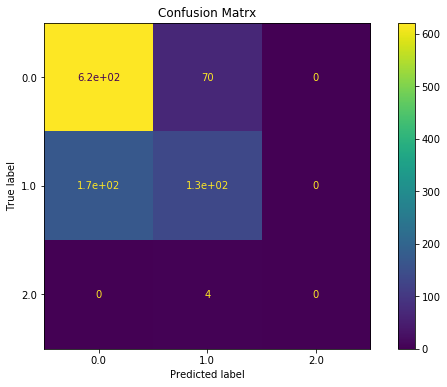

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X_test_scaled, y_test, display_labels= y_train.unique(), ax = ax)
disp.confusion_matrix

In [28]:
y_train.unique()

array([0., 1., 2., 3.])

In [39]:
import statsmodels.api as sm

In [40]:
X_train1 = sm.add_constant(X_train)

In [42]:
model =sm.OLS(y_train,X_train1).fit()

In [43]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Accident   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     5503.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:51:01   Log-Likelihood:            -4.9532e+05
No. Observations:              827246   AIC:                         9.907e+05
Df Residuals:                  827225   BIC:                         9.909e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3048      0.04